In [2]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data.csv')
df

,SALT,TEMP,VOLTAGE
0,NaCl,71.1,3.48
1,NaCl,55.5,3.55
2,NaCl,48.7,3.59
3,NaCl,40.7,3.64
4,NaCl,31.0,3.43
5,NaCl,25.5,3.35
6,KCl,77.3,3.48
7,KCl,58.6,3.55
8,KCl,46.8,3.59
9,KCl,36.9,3.64


In [4]:
def transfer_function(Vo, Vs=4.34):
    """ Return %RH given voltage output and supply voltage. """
    
    return ((Vo / Vs) - 0.16) / 0.0062

def temperature_compensation(RH, T):
    """ Give true true relative humidity given sensor relative humidity and temperature. """
    
    return RH / (1.0546 - 0.00216 * T)

In [63]:
df['RAW_RH'] = transfer_function(df['VOLTAGE'])
df['RH']     = temperature_compensation(RH=df['RAW_RH'], T=df['TEMP'])

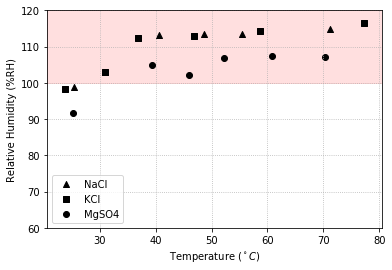

In [64]:
plt.scatter(df[df['SALT'] == 'NaCl' ]['TEMP'], df[df['SALT'] == 'NaCl' ]['RH'], label='NaCl',  marker='^', c='k')
plt.scatter(df[df['SALT'] == 'KCl'  ]['TEMP'], df[df['SALT'] == 'KCl'  ]['RH'], label='KCl',   marker='s', c='k')
plt.scatter(df[df['SALT'] == 'MgSO4']['TEMP'], df[df['SALT'] == 'MgSO4']['RH'], label='MgSO4', marker='o', c='k')

plt.xlabel('Temperature ($^\circ C$)')
plt.ylabel('Relative Humidity (%RH)')

plt.grid(linestyle=':')
plt.legend()

plt.axhspan(100, 1000, color='red', alpha=0.125, zorder=0)
plt.ylim((60, 120))

plt.show()

In [14]:
omega = pd.DataFrame()

omega['TEMP'] = [
     0,  5, 10, 15, 20, 25, 
    30, 35, 40, 45, 50, 55, 
    60, 65, 70, 80, 85, 90,
    95
]

omega['NaCl'] = [
    75.51, 75.65, 75.67, 75.61, 75.47,
    75.29, 75.09, 74.87, 74.68, 74.52,
    74.43, 74.41, 74.50, 74.71, 75.06,
    75.58, 76.29, np.nan, np.nan,
]

omega['KCl'] = [
    88.61, 87.67, 86.77, 85.92, 85.11,
    84.34, 83.62, 82.95, 82.32, 81.74,
    81.20, 80.70, 80.25, 79.85, 79.49,
    79.17, 78.90, 78.68, 78.50
]

omega

,TEMP,NaCl,KCl
0,0,75.51,88.61
1,5,75.65,87.67
2,10,75.67,86.77
3,15,75.61,85.92
4,20,75.47,85.11
5,25,75.29,84.34
6,30,75.09,83.62
7,35,74.87,82.95
8,40,74.68,82.32
9,45,74.52,81.74


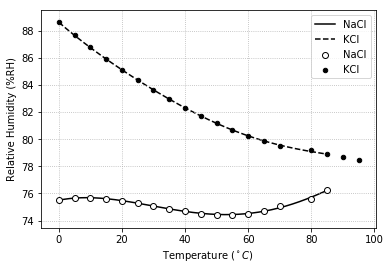

array([75.50055761, 75.50442119, 75.50824009, 75.51201445, 75.51574441,
       75.51943009, 75.52307164, 75.52666918, 75.53022287, 75.53373283,
       75.5371992 , 75.54062211, 75.5440017 , 75.54733811, 75.55063148,
       75.55388193, 75.55708961, 75.56025465, 75.56337719, 75.56645736,
       75.5694953 , 75.57249115, 75.57544504, 75.57835711, 75.5812275 ,
       75.58405633, 75.58684376, 75.5895899 , 75.59229491, 75.59495892,
       75.59758205, 75.60016446, 75.60270627, 75.60520762, 75.60766865,
       75.61008949, 75.61247029, 75.61481117, 75.61711227, 75.61937374,
       75.6215957 , 75.62377829, 75.62592165, 75.62802592, 75.63009123,
       75.63211772, 75.63410552, 75.63605477, 75.63796561, 75.63983817,
       75.64167259, 75.64346901, 75.64522756, 75.64694838, 75.64863161,
       75.65027737, 75.65188582, 75.65345708, 75.65499129, 75.65648859,
       75.65794911, 75.65937299, 75.66076036, 75.66211137, 75.66342615,
       75.66470483, 75.66594756, 75.66715446, 75.66832568, 75.66

In [60]:
T = np.linspace(0, 85, 1000)

c1 = np.polyfit(omega[omega['NaCl'].notnull()]['TEMP'], omega[omega['NaCl'].notnull()]['NaCl'], 5)
c2 = np.polyfit(omega[omega['KCl'].notnull()]['TEMP'],  omega[omega['KCl'].notnull()]['KCl'],  5)

f_NaCl = np.poly1d(c1)
f_KCl  = np.poly1d(c2)

plt.plot(T, f_NaCl(T), linewidth=1.5, linestyle='-',  c='k', zorder=1, label='NaCl')
plt.plot(T, f_KCl(T),  linewidth=1.5, linestyle='--', c='k', zorder=1, label='KCl')

plt.scatter(omega['TEMP'], omega['NaCl'], edgecolor='k', color='w', zorder=2)
plt.scatter(omega['TEMP'], omega['KCl'],  edgecolor='k', color='k', zorder=2, s=20)

plt.xlabel('Temperature ($^\circ C$)')
plt.ylabel('Relative Humidity (%RH)')

plt.grid(linestyle=':')
plt.legend()

plt.show()

f(T)

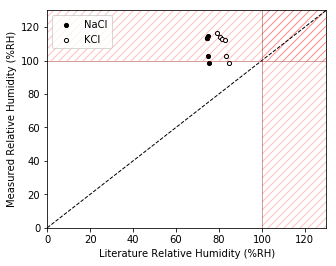

In [135]:
plt.figure(figsize=(5,4))

plt.scatter(f_NaCl(df[df['SALT'] == 'NaCl' ]['TEMP']), df[df['SALT'] == 'NaCl' ]['RH'], label='NaCl', c='k', edgecolor='k', s=17)
plt.scatter(f_KCl( df[df['SALT'] == 'KCl'  ]['TEMP']), df[df['SALT'] == 'KCl'  ]['RH'], label='KCl',  c='w', edgecolor='k', s=17)

plt.plot([0, 1000], [0, 1000], linestyle='--', c='k', linewidth=1)

plt.xlabel('Literature Relative Humidity (%RH)')
plt.ylabel('Measured Relative Humidity (%RH)')

plt.legend(loc='upper left')

plt.axhspan(100, 500, color='red', fill=False, hatch='///', alpha=0.25, lw=0)
plt.axvspan(100, 500, color='red', fill=False, hatch='///', alpha=0.25, lw=0)

plt.axhline(100, color='darkred', linewidth=0.75, alpha=0.5)
plt.axvline(100, color='darkred', linewidth=0.75, alpha=0.5)

plt.xlim((0, 130))
plt.ylim((0, 130))

plt.savefig('calibration_plot', dpi=300)
plt.show()